In [1]:
import mclimate as mclim
import farray as fa
import importlib
import numpy as np
import bottleneck
import xarray as xr
import pandas as pd
import bottleneck as bn

In [2]:
time = 96
date_range = pd.date_range('2000-01-01','2019-03-01')[pd.date_range('2000-01-01','2019-03-01').month.isin([12,1,2])]

In [3]:
date=date_range[100]

In [13]:
for date in date_range:
    gefs_mean = xr.open_dataset('../../espr/reforecast/v12/slp_mean_djf.nc',chunks={'time':10})
    gefs_mean = gefs_mean.sel(date=date.strftime('%Y%m%d%H')).sel(time=time)
    gefs_sprd = xr.open_dataset('../../espr/reforecast/v12/slp_sprd_djf.nc',chunks={'time':10})
    gefs_sprd = gefs_sprd.sel(date=date.strftime('%Y%m%d%H')).sel(time=time)
    mclimate = mclim.MClimate(date,'G:/Projects/espr/reforecast/v12','slp',time,v12=True,dask_enabled=True)
    mcli_mean = mclimate.generate()
    mcli_sprd = mclimate.generate(stat='sprd')
    percentile = mcli.load().rank('time')/len(mcli['time'])
    new_perc = percentile.where(np.logical_and(percentile >= percentile.isel(time=-1)-0.05, percentile <= percentile.isel(time=-1)+0.05),drop=True)
    mcli_sprd = mcli_sprd.where(~np.isnan(new_perc),drop=True)
    mcli_sprd = mcli_sprd.chunk({'time':10})

SyntaxError: can't assign to function call (<ipython-input-13-c6b2fccce30a>, line 1)

In [23]:
mcli_mean_load = mcli_mean.load()

In [35]:
bottleneck.rankdata(mcli_mean_load.msl,axis=0).shape

(420, 161, 561)

In [4]:
gefs_mean = xr.open_dataset('../../espr/reforecast/v12/slp_mean_djf.nc',chunks={'time':10})
gefs_mean = gefs_mean.sel(date=date.strftime('%Y%m%d%H'))
gefs_sprd = xr.open_dataset('../../espr/reforecast/v12/slp_sprd_djf.nc',chunks={'time':10})
gefs_sprd = gefs_sprd.sel(date=date.strftime('%Y%m%d%H'))a
mclimate = mclim.MClimate(date,'G:/Projects/espr/reforecast/v12','slp',time,v12=True,dask_enabled=True)
mcli_mean = mclimate.generate()
mcli_sprd = mclimate.generate(stat='sprd')

# percentile = mcli_mean.load().rank('time')/len(mcli_mean['time'])
# new_perc = percentile.where(np.logical_and(percentile >= percentile.isel(time=-1)-0.05, percentile <= percentile.isel(time=-1)+0.05),drop=True)
# mcli_sprd = mcli_sprd.where(~np.isnan(new_perc),drop=True)
# mcli_sprd = mcli_sprd.chunk({'time':10})

(array([ 2920.,  3542.,  6622.,  8620.,  8563.,  9074., 12878., 13397.,
        10966., 13739.]),
 array([0.01904762, 0.11404762, 0.20904762, 0.30404762, 0.39904762,
        0.49404762, 0.58904762, 0.68404762, 0.77904762, 0.87404762,
        0.96904762]),
 <BarContainer object of 10 artists>)

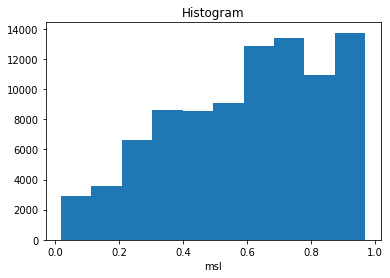

In [25]:
percentile.msl.isel(time=0).plot.hist()

In [8]:
mcli_mean

<xarray.Dataset>
Dimensions:    (latitude: 161, longitude: 561, time: 420)
Coordinates:
  * longitude  (longitude) float32 180.0 180.2 180.5 180.8 ... 319.5 319.8 320.0
  * latitude   (latitude) float32 60.0 59.75 59.5 59.25 ... 20.5 20.25 20.0
    fhour      float64 96.0
  * time       (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2019-12-31
    timestr    (time) <U42 '11' '12' '13' '14' '15' ... '118' '119' '120' '1231'
Data variables:
    msl        (time, latitude, longitude) float32 dask.array<chunksize=(420, 161, 561), meta=np.ndarray>

In [5]:
bottleneck.rankdata(mcli_mean.msl,axis=1)/len(x_ranks)

array([[[161., 161., 161., ...,   1.,   1.,   1.],
        [160., 160., 160., ...,   2.,   2.,   2.],
        [159., 159., 159., ...,   3.,   3.,   3.],
        ...,
        [ 87.,  89.,  89., ...,  47.,  47.,  47.],
        [ 86.,  87.,  88., ...,  45.,  46.,  46.],
        [ 85.,  86.,  87., ...,  44.,  44.,  45.]],

       [[161., 161., 161., ...,  33.,  32.,  32.],
        [160., 160., 160., ...,  31.,  31.,  31.],
        [159., 159., 159., ...,  30.,  30.,  30.],
        ...,
        [113., 112., 113., ...,  68.,  67.,  67.],
        [111., 111., 110., ...,  67.,  66.,  66.],
        [110., 109., 109., ...,  65.,  65.,  65.]],

       [[161., 161., 161., ...,   1.,   1.,   1.],
        [160., 160., 160., ...,   2.,   2.,   2.],
        [159., 159., 159., ...,   3.,   3.,   3.],
        ...,
        [ 94.,  95.,  94., ...,  61.,  62.,  62.],
        [ 91.,  92.,  93., ...,  59.,  60.,  61.],
        [ 90.,  91.,  91., ...,  58.,  59.,  59.]],

       ...,

       [[101., 100., 100

In [6]:
def ranker(x):
    x_ranks = bottleneck.rankdata(x, axis=-1)
    return x_ranks/len(x_ranks)
def rankdata(obj, dim):
    func = lambda x: bottleneck.rankdata(x,axis=-1)/len(x)
    return xr.apply_ufunc(func, obj,input_core_dims=[[dim]],
        dask="parallelized"
    )
percentile = rankdata(mcli_mean,'time')

In [7]:
percentile

<xarray.Dataset>
Dimensions:    (latitude: 161, longitude: 561)
Coordinates:
  * longitude  (longitude) float32 180.0 180.2 180.5 180.8 ... 319.5 319.8 320.0
  * latitude   (latitude) float32 60.0 59.75 59.5 59.25 ... 20.5 20.25 20.0
    fhour      float64 96.0
Data variables:
    msl        (latitude, longitude) float64 dask.array<chunksize=(161, 561), meta=np.ndarray>

In [37]:
percentile

<xarray.Dataset>
Dimensions:    (latitude: 161, longitude: 561, time: 420)
Coordinates:
  * longitude  (longitude) float32 180.0 180.2 180.5 180.8 ... 319.5 319.8 320.0
  * latitude   (latitude) float32 60.0 59.75 59.5 59.25 ... 20.5 20.25 20.0
    fhour      float64 96.0
  * time       (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2019-12-31
    timestr    (time) <U42 '11' '12' '13' '14' '15' ... '118' '119' '120' '1231'
Data variables:
    msl        (time, latitude, longitude) float64 0.85 0.85 ... 0.2667 0.2714